In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.models import Sequential
from keras.utils import np_utils
import theano

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu is not available  (error: Unable to get the number of gpus available: unknown error)


In [3]:
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')

In [4]:
X_train = X_train.reshape((60000,28,28))

In [5]:
Y_train = np_utils.to_categorical(Y_train)

In [6]:
X_train.shape , Y_train.shape

((60000, 28, 28), (60000, 10))

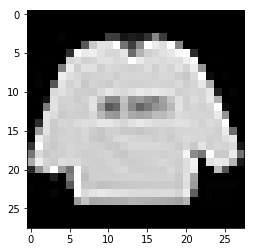

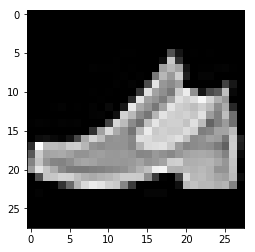

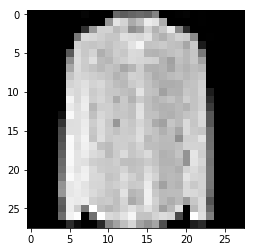

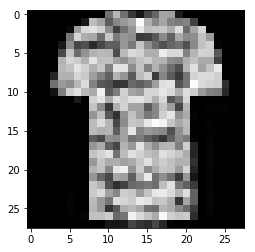

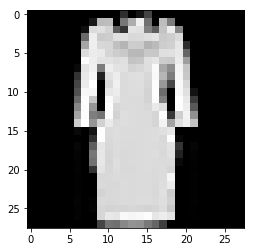

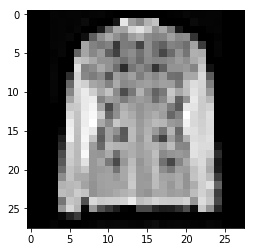

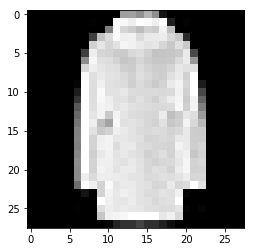

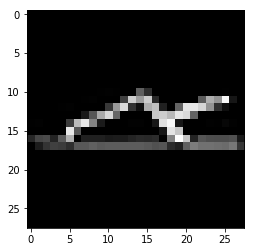

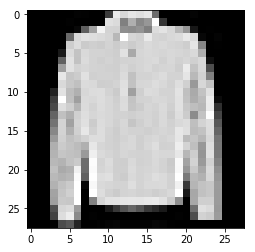

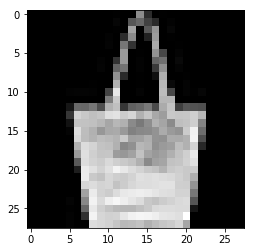

In [7]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(X_train[ix], interpolation='none', cmap='gray')
plt.show()

In [8]:
X_train = (X_train - X_train.mean())/X_train.std()

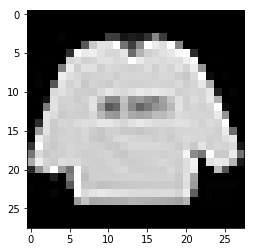

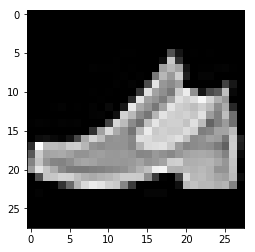

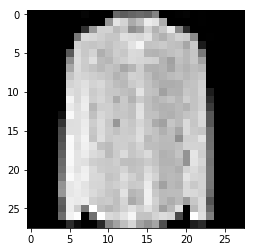

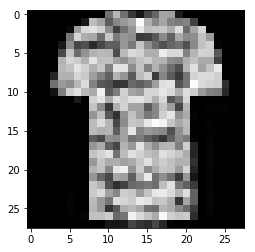

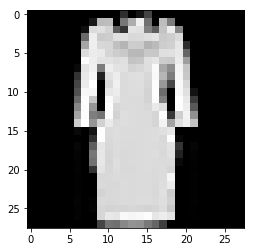

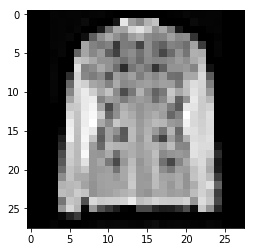

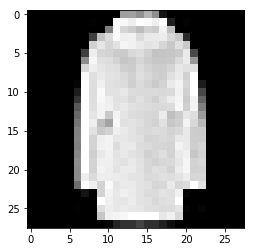

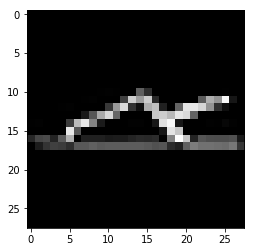

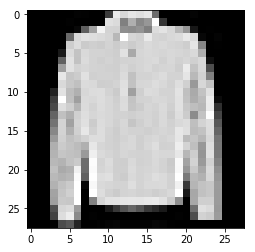

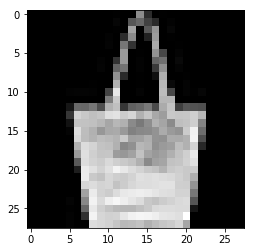

In [9]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(X_train[ix], interpolation='none', cmap='gray')
plt.show()

In [10]:
X_train = X_train.reshape((60000,28,28,1))

In [14]:
model = Sequential()

model.add(Convolution2D( 32, (3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64, (3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, (3,3),activation='relu'))
model.add(Convolution2D(32, (3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 32)          18464     
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 32)          0         
__________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
hist = model.fit(X_train,Y_train,
                 epochs=10,
                 shuffle=True,
                 batch_size=256,
                 validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 1024/48000 [..............................] - ETA: 317s - loss: 6.3850 - acc: 0.1045

KeyboardInterrupt: 